# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
plt.style.use('seaborn')

### Load Dataset

In [3]:
df_employee = pd.read_csv('employee.csv')

In [4]:
df_employee.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000


### Explore Data

In [7]:
print('Total data:', df_employee.shape[0])

Total data: 10


In [6]:
df_employee.dtypes

no                int64
nama             object
tanggal_lahir    object
jenis_kelamin    object
gaji              int64
dtype: object

In [8]:
df_employee.isnull().any()

no               False
nama             False
tanggal_lahir    False
jenis_kelamin    False
gaji             False
dtype: bool

### Preprocess Data

#### Handling Datetime

In [44]:
df_employee['tanggal_lahir'] = pd.to_datetime(df_employee['tanggal_lahir'])

In [45]:
df_employee.tail()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
5,6,ina,1991-05-06,perempuan,5000000
6,7,nia,1990-04-05,perempuan,2500000
7,8,dodi,1998-04-03,laki-laki,3400000
8,9,dedi,1993-06-20,laki-laki,8900000
9,10,roni,2001-09-20,laki-laki,2100000


#### Handling Categorical Values (One-hot Encoder)

jk = jenis kelamin

In [14]:
jk_dummies = pd.get_dummies(df_employee['jenis_kelamin'], prefix='jk')
jk_dummies.head()

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [15]:
pd.concat([df_employee, jk_dummies])

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1.0,ani,3/2/1993,perempuan,1000000.0,NaN,NaN
1,2.0,budi,3/1/1992,laki-laki,2000000.0,NaN,NaN
2,3.0,susi,4/5/2000,perempuan,1350000.0,NaN,NaN
3,4.0,wati,5/20/1995,perempuan,10000000.0,NaN,NaN
4,5.0,ati,4/23/1994,perempuan,3400000.0,NaN,NaN
5,6.0,ina,5/6/1991,perempuan,5000000.0,NaN,NaN
6,7.0,nia,4/5/1990,perempuan,2500000.0,NaN,NaN
7,8.0,dodi,4/3/1998,laki-laki,3400000.0,NaN,NaN
8,9.0,dedi,6/20/1993,laki-laki,8900000.0,NaN,NaN
9,10.0,roni,9/20/2001,laki-laki,2100000.0,NaN,NaN


In [18]:
df_employee_jk = pd.concat([df_employee, jk_dummies], axis=1)
df_employee_jk.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,3/2/1993,perempuan,1000000,0,1
1,2,budi,3/1/1992,laki-laki,2000000,1,0
2,3,susi,4/5/2000,perempuan,1350000,0,1
3,4,wati,5/20/1995,perempuan,10000000,0,1
4,5,ati,4/23/1994,perempuan,3400000,0,1


In [19]:
del df_employee_jk['jenis_kelamin']

In [20]:
df_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan
0,1,ani,3/2/1993,1000000,0,1
1,2,budi,3/1/1992,2000000,1,0
2,3,susi,4/5/2000,1350000,0,1
3,4,wati,5/20/1995,10000000,0,1
4,5,ati,4/23/1994,3400000,0,1
5,6,ina,5/6/1991,5000000,0,1
6,7,nia,4/5/1990,2500000,0,1
7,8,dodi,4/3/1998,3400000,1,0
8,9,dedi,6/20/1993,8900000,1,0
9,10,roni,9/20/2001,2100000,1,0


### Handling Categorical Values (Label Encoder)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [25]:
df_employee_jk['jk_label'] = le.fit_transform(df_employee['jenis_kelamin'])

In [26]:
df_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,3/2/1993,1000000,0,1,1
1,2,budi,3/1/1992,2000000,1,0,0
2,3,susi,4/5/2000,1350000,0,1,1
3,4,wati,5/20/1995,10000000,0,1,1
4,5,ati,4/23/1994,3400000,0,1,1
5,6,ina,5/6/1991,5000000,0,1,1
6,7,nia,4/5/1990,2500000,0,1,1
7,8,dodi,4/3/1998,3400000,1,0,0
8,9,dedi,6/20/1993,8900000,1,0,0
9,10,roni,9/20/2001,2100000,1,0,0


### Handling Numerical Values (Standard Scaler)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [42]:
df_employee_jk['sc_gaji'] = sc.fit_transform(df_employee_jk[['gaji']])

In [46]:
df_employee_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,mx_gaji,sc_gaji
0,1,ani,3/2/1993,1000000,0,1,1,0.000000,-1.001779
1,2,budi,3/1/1992,2000000,1,0,0,0.111111,-0.663911
2,3,susi,4/5/2000,1350000,0,1,1,0.038889,-0.883525
3,4,wati,5/20/1995,10000000,0,1,1,1.000000,2.039035
4,5,ati,4/23/1994,3400000,0,1,1,0.266667,-0.190896


[]

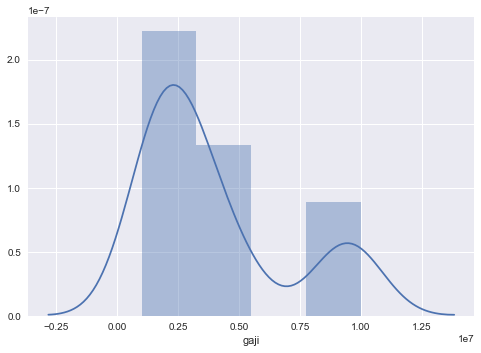

In [35]:
sns.distplot(df_employee_jk['gaji'])
plt.plot()

[]

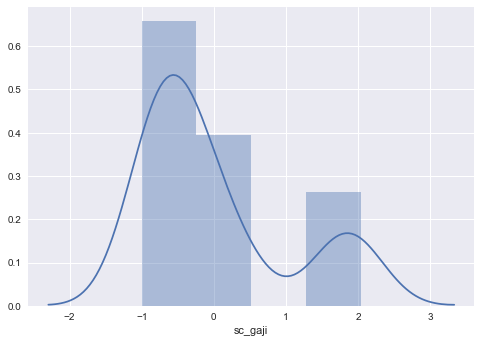

In [47]:
sns.distplot(df_employee_jk['sc_gaji'])
plt.plot()

### Handling Numerical Values (Min-Max Scaler)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mx = MinMaxScaler()

In [53]:
df_employee_jk['mx_gaji'] = mx.fit_transform(df_employee_jk[['gaji']])

In [54]:
df_employee_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,mx_gaji,sc_gaji
0,1,ani,3/2/1993,1000000,0,1,1,0.000000,-1.001779
1,2,budi,3/1/1992,2000000,1,0,0,0.111111,-0.663911
2,3,susi,4/5/2000,1350000,0,1,1,0.038889,-0.883525
3,4,wati,5/20/1995,10000000,0,1,1,1.000000,2.039035
4,5,ati,4/23/1994,3400000,0,1,1,0.266667,-0.190896


[]

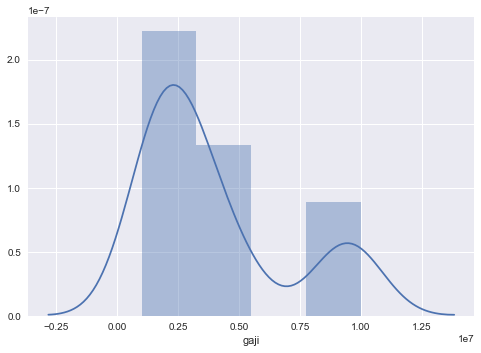

In [55]:
sns.distplot(df_employee['gaji'])
plt.plot()

[]

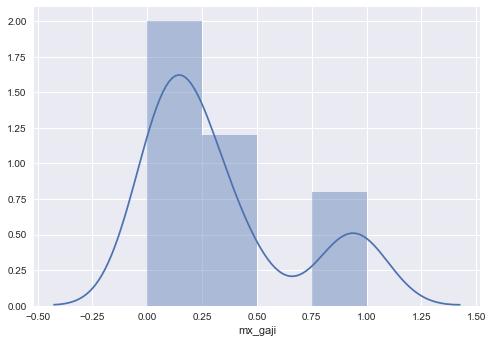

In [56]:
sns.distplot(df_employee_jk['mx_gaji'])
plt.plot()